In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-4298279c-7d3e-02d0-05de-5b4059c2c28e)


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ELI5")

In [ ]:
from single_group_sw_tsne import *

In [ ]:
class ArgumentsTSN():
  def __init__(self):
    self.data = "data/wiki/30k/wiki30k_reps.dat"
    #self.questions = "../data/q_20_reps.npy"
    self.cuda = 1  # if use cuda accelarate
    self.input_dim = 128  # input dimension
    self.output_dim = 64  # output dimension
    self.initial_momentum = 0.5   # initial momentum
    self.initial_iter = 10 # number of beginning interations to apply intial_momentum 
    self.early_exag = 20  # number of beginning interations to apply P value exaggeration
    self.final_momentum = 0.8  # final momentum
    self.exag_factor = 4.  # exag factor for P value for first early_exag iterations
    self.max_iter = 300    # maximum iteration

    self.init_method = "rand"   # pca / random initialization of reduced embedding

    self.window_size = 5000   # window size for each tsne computation
    self.jump_size = 1500    # (window - overlap size) for each tsne computation")
    self.perplexity = 30.0    
    self.n = 29727    # number of data points
    self.eta = 500
    self.min_gain = 0.01

opt = ArgumentsTSN()

In [ ]:
data = opt.data
jump_size = opt.jump_size
max_iter = opt.max_iter
N = opt.n
window_size = opt.window_size

In [ ]:
 # @TODO, no sure if this tensor is too large? Probably we need to use CPU first
X = np.memmap(opt.data, dtype='float32', mode='r', shape=(opt.n, opt.input_dim))
X = torch.Tensor(X)
#X = torch.randn([29727, 128])
'''
with open (opt.questions, "rb") as f:
  Q = np.load(f)
Q = torch.tensor(Q)
assert(X.shape[1] == Q.shape[1])
'''

assert(X.shape[0] == N)
print(X.shape)

torch.Size([29727, 128])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Y = torch.zeros((N, opt.output_dim))
b_s = (N - window_size) // jump_size + 2
print(f"Batches to run: {b_s}")

Batches to run: 18


In [ ]:
cur_Y = None
loss = []
batch_first_loss = []

In [ ]:
with torch.no_grad():
  for batch_idx in tqdm(range(b_s), total=b_s, position=0, leave=True):
    start = batch_idx * jump_size
    end = min(start + window_size, opt.n)
    print(start, end)

    cur_Y, cur_loss = tsne(X[start:end], max_iter=max_iter, window_size=min(window_size, end-start), jump_size=jump_size, prev_feat=cur_Y)
    batch_first_loss.append(cur_loss[0])
    loss.extend(cur_loss)
    Y[start:end] = cur_Y
    if end == opt.n: break

  0%|          | 0/300 [00:00<?, ?it/s]

0 5000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:04,  2.40it/s]

iteration 0, error 56453.438782735364, dis 943546.5612172646


 17%|█▋        | 51/300 [00:20<01:42,  2.44it/s]

iteration 50, error 12418.374230531563, dis 45359.35131463808


 34%|███▎      | 101/300 [00:41<01:23,  2.37it/s]

iteration 100, error 12429.837229553195, dis -0.4944685402442701


 50%|█████     | 151/300 [01:02<01:02,  2.37it/s]

iteration 150, error 12377.56209240115, dis 27.787022330321633


 67%|██████▋   | 201/300 [01:22<00:40,  2.47it/s]

iteration 200, error 12383.74122926025, dis 0.1572977660507604


 84%|████████▎ | 251/300 [01:43<00:19,  2.49it/s]

iteration 250, error 12364.108131571644, dis 3.3716304539448174


  0%|          | 0/300 [00:00<?, ?it/s]

1500 6500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:03,  2.42it/s]

iteration 0, error 54996.05124518112, dis 945003.9487548189


 17%|█▋        | 51/300 [00:20<01:40,  2.49it/s]

iteration 50, error 11956.918710508016, dis 43601.64376956523


 34%|███▎      | 101/300 [00:40<01:21,  2.45it/s]

iteration 100, error 11896.52125883312, dis 4.821540401480888


 50%|█████     | 151/300 [01:01<01:02,  2.38it/s]

iteration 150, error 11883.286364942, dis 7.423975710167724


 67%|██████▋   | 201/300 [01:21<00:40,  2.47it/s]

iteration 200, error 11882.974032434931, dis 7.814735909791125


 84%|████████▎ | 251/300 [01:41<00:21,  2.33it/s]

iteration 250, error 11858.585753579348, dis 43.89835089108965


  0%|          | 0/300 [00:00<?, ?it/s]

3000 8000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:00,  2.48it/s]

iteration 0, error 154953.0431404111, dis 845046.9568595889


 17%|█▋        | 51/300 [00:20<01:40,  2.47it/s]

iteration 50, error 36988.07332265087, dis 131955.96659547783


 34%|███▎      | 101/300 [00:41<01:21,  2.43it/s]

iteration 100, error 34472.29142925373, dis 12.886528996532434


 50%|█████     | 151/300 [01:01<01:01,  2.43it/s]

iteration 150, error 34058.11154110855, dis 72.33823440610286


 67%|██████▋   | 201/300 [01:21<00:39,  2.48it/s]

iteration 200, error 33996.304075815904, dis 76.77578479905787


 84%|████████▎ | 251/300 [01:42<00:20,  2.41it/s]

iteration 250, error 33977.82535160736, dis 50.82126368799072


  0%|          | 0/300 [00:00<?, ?it/s]

4500 9500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<01:59,  2.50it/s]

iteration 0, error 89399.26038984844, dis 910600.7396101516


 17%|█▋        | 51/300 [00:21<01:43,  2.41it/s]

iteration 50, error 24857.000520207926, dis 86803.60215882206


 34%|███▎      | 101/300 [00:42<01:23,  2.39it/s]

iteration 100, error 22229.434320089927, dis 37.27305222061841


 50%|█████     | 151/300 [01:03<01:00,  2.47it/s]

iteration 150, error 20534.1328929862, dis 25.204423402345128


 67%|██████▋   | 201/300 [01:23<00:39,  2.48it/s]

iteration 200, error 19946.528929929867, dis 19.884167329379125


 84%|████████▎ | 251/300 [01:43<00:20,  2.41it/s]

iteration 250, error 19620.39860630857, dis 28.976843016498606


  0%|          | 0/300 [00:00<?, ?it/s]

6000 11000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<01:59,  2.51it/s]

iteration 0, error 3294344.420646661, dis -2294344.420646661


 17%|█▋        | 51/300 [00:20<01:42,  2.43it/s]

iteration 50, error 845300.4190212286, dis 2857745.529810397


 34%|███▎      | 101/300 [00:41<01:25,  2.33it/s]

iteration 100, error 773545.5750869171, dis 646.0384310038062


 50%|█████     | 151/300 [01:02<01:02,  2.38it/s]

iteration 150, error 737014.0808299177, dis -292.9017870152602


 67%|██████▋   | 201/300 [01:23<00:40,  2.42it/s]

iteration 200, error 734901.372806055, dis -146.03981804882642


 84%|████████▎ | 251/300 [01:44<00:20,  2.39it/s]

iteration 250, error 735179.9293981909, dis -522.6558041647077


  0%|          | 0/300 [00:00<?, ?it/s]

7500 12500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<01:58,  2.51it/s]

iteration 0, error 7620360.259230075, dis -6620360.259230075


 17%|█▋        | 51/300 [00:20<01:40,  2.48it/s]

iteration 50, error 1721365.0521688187, dis 5865589.729391007


 34%|███▎      | 101/300 [00:40<01:20,  2.48it/s]

iteration 100, error 1658916.8158140643, dis 1532.4320904589258


 50%|█████     | 151/300 [01:00<01:02,  2.37it/s]

iteration 150, error 1621500.9493875215, dis 485.98272343352437


 67%|██████▋   | 201/300 [01:21<00:39,  2.50it/s]

iteration 200, error 1609667.8796377494, dis 541.6375145497732


 84%|████████▎ | 251/300 [01:41<00:19,  2.46it/s]

iteration 250, error 1606567.3845388987, dis 659.0339923000429


  0%|          | 0/300 [00:00<?, ?it/s]

9000 14000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:02,  2.44it/s]

iteration 0, error 145456.84220957942, dis 854543.1577904206


 17%|█▋        | 51/300 [00:21<01:41,  2.44it/s]

iteration 50, error 27436.748960294964, dis 98564.87179383174


 34%|███▎      | 101/300 [00:41<01:24,  2.37it/s]

iteration 100, error 27385.564514251564, dis 22.114793375661975


 50%|█████     | 151/300 [01:02<01:00,  2.48it/s]

iteration 150, error 27409.33898465994, dis -28.98821833371767


 67%|██████▋   | 201/300 [01:22<00:39,  2.49it/s]

iteration 200, error 27342.205504992176, dis -15.296684421082318


 84%|████████▎ | 251/300 [01:43<00:20,  2.39it/s]

iteration 250, error 27319.230142095126, dis -3.8125508501070726


  0%|          | 0/300 [00:00<?, ?it/s]

10500 15500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:04,  2.39it/s]

iteration 0, error 362693.35214272444, dis 637306.6478572756


 17%|█▋        | 51/300 [00:20<01:41,  2.45it/s]

iteration 50, error 96293.50556707851, dis 334603.4973713602


 34%|███▎      | 101/300 [00:41<01:21,  2.43it/s]

iteration 100, error 86172.8474046165, dis 192.47857406141702


 50%|█████     | 151/300 [01:01<01:00,  2.45it/s]

iteration 150, error 81900.01118467748, dis 171.19177968222357


 67%|██████▋   | 201/300 [01:22<00:40,  2.43it/s]

iteration 200, error 80893.49201122049, dis 24.82397668909107


 84%|████████▎ | 251/300 [01:43<00:19,  2.47it/s]

iteration 250, error 80280.17380528539, dis 71.70224651237368


  0%|          | 0/300 [00:00<?, ?it/s]

12000 17000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:02,  2.45it/s]

iteration 0, error 84805.4316319766, dis 915194.5683680234


 17%|█▋        | 51/300 [00:21<01:44,  2.39it/s]

iteration 50, error 17932.41802005669, dis 65034.459759035075


 34%|███▎      | 101/300 [00:41<01:25,  2.34it/s]

iteration 100, error 18022.48634567947, dis -34.52082391134172


 50%|█████     | 151/300 [01:02<01:02,  2.38it/s]

iteration 150, error 17917.40507279537, dis 16.49867012049799


 67%|██████▋   | 201/300 [01:23<00:42,  2.35it/s]

iteration 200, error 17920.114582712413, dis 10.347117461056769


 84%|████████▎ | 251/300 [01:44<00:20,  2.44it/s]

iteration 250, error 17945.626523306608, dis -45.732308876620664


  0%|          | 0/300 [00:00<?, ?it/s]

13500 18500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:08,  2.34it/s]

iteration 0, error 258160.34578341144, dis 741839.6542165886


 17%|█▋        | 51/300 [00:20<01:40,  2.48it/s]

iteration 50, error 60198.14925167896, dis 213083.5440523135


 34%|███▎      | 101/300 [00:41<01:22,  2.40it/s]

iteration 100, error 57494.4892296389, dis -19.591469266539207


 50%|█████     | 151/300 [01:01<01:00,  2.47it/s]

iteration 150, error 56990.11889611051, dis 50.716614296034095


 67%|██████▋   | 201/300 [01:22<00:40,  2.46it/s]

iteration 200, error 56925.30685948199, dis -127.99036734277615


 84%|████████▎ | 251/300 [01:42<00:20,  2.40it/s]

iteration 250, error 56827.02661127136, dis -38.444418135331944


  0%|          | 0/300 [00:00<?, ?it/s]

15000 20000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:00,  2.49it/s]

iteration 0, error 76903.64129438603, dis 923096.358705614


 17%|█▋        | 51/300 [00:21<01:42,  2.42it/s]

iteration 50, error 16472.381023315356, dis 59821.325958112466


 34%|███▎      | 101/300 [00:41<01:21,  2.45it/s]

iteration 100, error 16477.249354534615, dis -14.878231376416807


 50%|█████     | 151/300 [01:03<01:02,  2.38it/s]

iteration 150, error 16446.749305296213, dis -54.63860223335723


 67%|██████▋   | 201/300 [01:24<00:41,  2.41it/s]

iteration 200, error 16386.550582834632, dis -5.3864247711826465


 84%|████████▎ | 251/300 [01:44<00:20,  2.38it/s]

iteration 250, error 16408.463123642556, dis -36.2930605095371


  0%|          | 0/300 [00:00<?, ?it/s]

16500 21500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:02,  2.44it/s]

iteration 0, error 146484.7716635324, dis 853515.2283364676


 17%|█▋        | 51/300 [00:21<01:42,  2.44it/s]

iteration 50, error 32589.54780549746, dis 117014.60695288537


 34%|███▎      | 101/300 [00:41<01:25,  2.33it/s]

iteration 100, error 32136.58984870815, dis 4.1724768819367455


 50%|█████     | 151/300 [01:02<01:03,  2.33it/s]

iteration 150, error 32045.610222195348, dis -7.160964966969914


 67%|██████▋   | 201/300 [01:24<00:42,  2.34it/s]

iteration 200, error 32019.332829467752, dis 27.61935045367136


 84%|████████▎ | 251/300 [01:46<00:21,  2.33it/s]

iteration 250, error 32008.810333866983, dis -21.07632950108018


  0%|          | 0/300 [00:00<?, ?it/s]

18000 23000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:08,  2.33it/s]

iteration 0, error 36805.42370605761, dis 963194.5762939424


 17%|█▋        | 51/300 [00:21<01:44,  2.38it/s]

iteration 50, error 7837.566900355359, dis 28882.322919593793


 34%|███▎      | 101/300 [00:42<01:23,  2.38it/s]

iteration 100, error 7865.6460553455945, dis -18.518372229471424


 50%|█████     | 151/300 [01:03<01:03,  2.33it/s]

iteration 150, error 7853.9254425056, dis -14.252074964205349


 67%|██████▋   | 201/300 [01:25<00:42,  2.36it/s]

iteration 200, error 7835.283804235328, dis 14.554016271075852


 84%|████████▎ | 251/300 [01:46<00:20,  2.36it/s]

iteration 250, error 7840.91062385798, dis -6.088906870465507


  0%|          | 0/300 [00:00<?, ?it/s]

19500 24500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:07,  2.35it/s]

iteration 0, error 33835.85356267204, dis 966164.146437328


 17%|█▋        | 51/300 [00:20<01:39,  2.50it/s]

iteration 50, error 7696.818706099325, dis 28347.066351033947


 34%|███▎      | 101/300 [00:41<01:20,  2.46it/s]

iteration 100, error 7295.5399150504845, dis 0.052838715101643174


 50%|█████     | 151/300 [01:02<01:02,  2.38it/s]

iteration 150, error 7274.661227306199, dis -0.051227569636466797


 67%|██████▋   | 201/300 [01:23<00:41,  2.39it/s]

iteration 200, error 7264.34347619741, dis -2.2990382465659422


 84%|████████▎ | 251/300 [01:43<00:20,  2.39it/s]

iteration 250, error 7273.07433813256, dis -10.592548212028305


  0%|          | 0/300 [00:00<?, ?it/s]

21000 26000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:13,  2.24it/s]

iteration 0, error 59030.237311844714, dis 940969.7626881553


 17%|█▋        | 51/300 [00:21<01:46,  2.34it/s]

iteration 50, error 13173.187794119749, dis 47958.02304894544


 34%|███▎      | 101/300 [00:43<01:24,  2.35it/s]

iteration 100, error 12842.897046120986, dis -22.42188769620043


 50%|█████     | 151/300 [01:04<01:03,  2.34it/s]

iteration 150, error 12801.258558954767, dis 2.150986988810473


 67%|██████▋   | 201/300 [01:26<00:42,  2.34it/s]

iteration 200, error 12813.314037349022, dis 3.924694727435053


 84%|████████▎ | 251/300 [01:47<00:20,  2.41it/s]

iteration 250, error 12787.774901458724, dis -3.734067855126341


  0%|          | 0/300 [00:00<?, ?it/s]

22500 27500
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:02,  2.45it/s]

iteration 0, error 118638.4899813947, dis 881361.5100186053


 17%|█▋        | 51/300 [00:21<01:40,  2.47it/s]

iteration 50, error 29350.96633618824, dis 104462.36507633557


 34%|███▎      | 101/300 [00:41<01:22,  2.41it/s]

iteration 100, error 28643.651393973858, dis 58.351861379051115


 50%|█████     | 151/300 [01:02<01:02,  2.39it/s]

iteration 150, error 27352.64090520574, dis -18.512254258548637


 67%|██████▋   | 201/300 [01:23<00:40,  2.42it/s]

iteration 200, error 26632.24978848602, dis -25.078072429372696


 84%|████████▎ | 251/300 [01:44<00:20,  2.41it/s]

iteration 250, error 26389.48714192216, dis -9.845980734837212


  0%|          | 0/300 [00:00<?, ?it/s]

24000 29000
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<02:10,  2.29it/s]

iteration 0, error 1472447.5639669292, dis -472447.5639669292


 17%|█▋        | 51/300 [00:21<01:46,  2.33it/s]

iteration 50, error 361912.40393460786, dis 1246732.2628133046


 34%|███▎      | 101/300 [00:42<01:23,  2.39it/s]

iteration 100, error 332633.9958614319, dis 767.4869944547536


 50%|█████     | 151/300 [01:03<01:01,  2.44it/s]

iteration 150, error 327271.8558997995, dis 32.92530068231281


 67%|██████▋   | 201/300 [01:24<00:42,  2.35it/s]

iteration 200, error 326377.42546332895, dis 365.9637176110409


 84%|████████▎ | 251/300 [01:46<00:21,  2.31it/s]

iteration 250, error 326181.55631319515, dis 645.7738591358066


  0%|          | 0/300 [00:00<?, ?it/s]

25500 29727
Preprocessing the data using PCA...


  0%|          | 1/300 [00:00<01:55,  2.58it/s]

iteration 0, error 68118.15743584173, dis 931881.8425641583


 17%|█▋        | 51/300 [00:18<01:27,  2.84it/s]

iteration 50, error 13608.330885440384, dis 49638.907165682875


 34%|███▎      | 101/300 [00:35<01:11,  2.78it/s]

iteration 100, error 13644.471396065888, dis -19.406178777557216


 50%|█████     | 151/300 [00:53<00:53,  2.78it/s]

iteration 150, error 13612.00814533858, dis -11.330631349388568


 67%|██████▋   | 201/300 [01:11<00:35,  2.77it/s]

iteration 200, error 13601.530661977438, dis -13.741016126834438


 84%|████████▎ | 251/300 [01:30<00:17,  2.75it/s]

iteration 250, error 13608.713412674711, dis -1.6515434540651768


100%|██████████| 300/300 [01:48<00:00,  2.78it/s]


In [ ]:
print(Y.shape)
path = f"out/ws_{window_size}_js_{jump_size}_init_{opt.init_method}"
# save output
torch.save(Y, f"{path}.pt")
torch.save(torch.tensor(loss), f"{path}_loss.pt")
torch.save(torch.tensor(batch_first_loss), f"{path}_batch_first_loss.pt")

torch.Size([29727, 64])


Analysis for randomly initialized loss.

[   0    1    2 ... 5397 5398 5399]


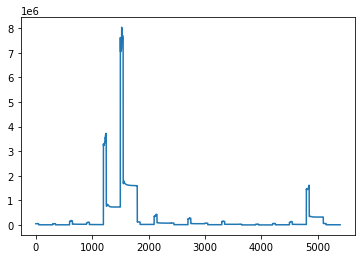

In [ ]:
import matplotlib.pyplot as plt
x_axis = np.arange(0, len(loss))
print(x_axis)
plt.plot(x_axis, np.array(loss))
plt.show()

In [ ]:
plt.close()

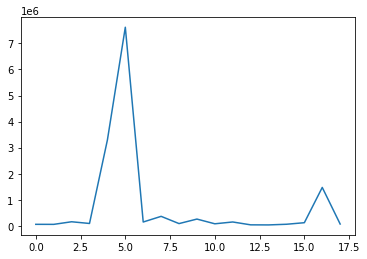

In [ ]:
x_h_axis = np.arange(0, len(batch_first_loss))
plt.plot(x_h_axis, np.array(batch_first_loss))
plt.show()

In [ ]:
plt.close()

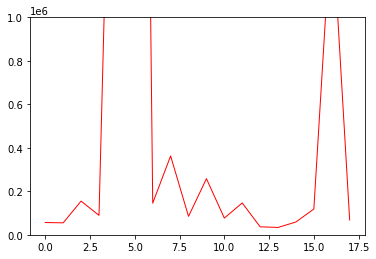

In [ ]:
ax=plt.subplot(111)
ax.plot(x_h_axis, batch_first_loss, color='r',linewidth=1.0)
ax.set_ylim(0,1e6)
plt.show()

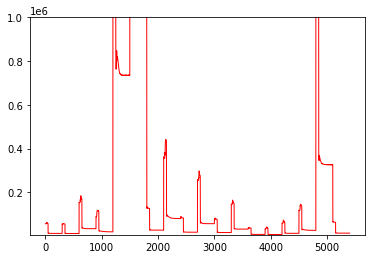

In [ ]:
ax=plt.subplot(111)
ax.plot(x_axis, loss, color='r',linewidth=1.0)
ax.set_ylim(6e3,1e6)
plt.show()

Analysis for pca init loss

In [ ]:
pca_full_loss = torch.load('out/max_300/ws_5000_js_1500_init_pca_loss.pt').detach().cpu().numpy()

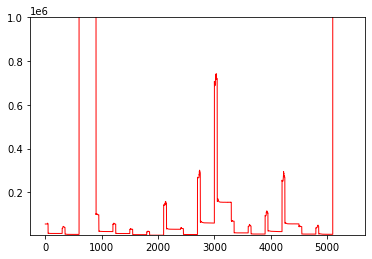

In [ ]:
ax=plt.subplot(111)
ax.plot(x_axis, pca_full_loss, color='r',linewidth=1.0)
ax.set_ylim(6e3,1e6)
plt.show()

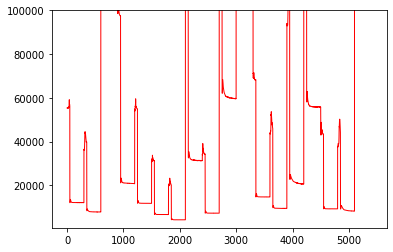

In [ ]:
ax=plt.subplot(111)
ax.plot(x_axis, pca_full_loss, color='r',linewidth=1.0)
ax.set_ylim(6e2,1e5)
plt.show()

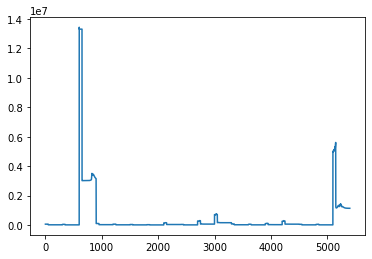

In [ ]:
plt.plot(x_axis, pca_full_loss)
plt.show()

In [ ]:
pca_head_loss = torch.load('out/max_300/ws_5000_js_1500_init_pca_batch_first_loss.pt').detach().cpu().numpy()

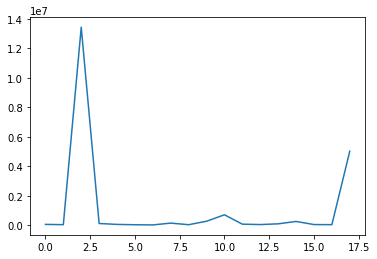

In [ ]:
plt.plot(x_h_axis, pca_head_loss)
plt.show()

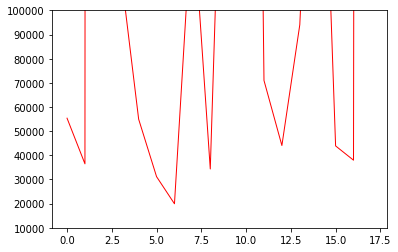

In [ ]:
ax=plt.subplot(111)
ax.plot(x_h_axis, pca_head_loss, color='r',linewidth=1.0)
ax.set_ylim(1e4,1e5)
plt.show()